In [790]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import plotly.express as px

In [ ]:
# Create CityBikes API *

In [415]:
#make api call

import requests
api_url = "http://api.citybik.es/v2/networks/velib?fields=id,location,name"
response = requests.get(api_url)
data = response.json()

In [416]:
# check dictionary keys

data.keys()

dict_keys(['network'])

In [449]:
data1 = data['network']['stations']
data1[0]

{'empty_slots': 29,
 'extra': {'banking': False,
  'ebikes': 3,
  'last_updated': 1693242757,
  'payment-terminal': False,
  'renting': 1,
  'returning': 1,
  'slots': 35,
  'station_id': 213688169,
  'uid': '16107'},
 'free_bikes': 4,
 'id': '78ec9186acd18a0b30bd3156d24b9f8d',
 'latitude': 48.865983,
 'longitude': 2.275725,
 'name': 'Benjamin Godard - Victor Hugo',
 'timestamp': '2023-08-28T17:27:58.123000Z'}

In [473]:
stat = 0
stations_list = []

for station in data1:
    lat = data1[stat]['latitude']
    long = data1[stat]['longitude']
    empty_slots = data1[stat]['empty_slots']
    free_bikes = data1[stat]['free_bikes']
    
    station_dict = {
        'lat' : lat,
        'long' : long, 
        'empty_slots' : empty_slots,
        'free_bikes' : free_bikes}
    
    stations_list.append(station_dict)
    
    stat +=1
    
cb_df = pd.DataFrame(stations_list)
cb_df

,lat,long,empty_slots,free_bikes
0,48.865983,2.275725,29,4
1,48.853756,2.339096,3,50
2,48.867872,2.364898,28,9
3,48.856452,2.334852,16,3
4,48.879296,2.337360,15,4
...,...,...,...,...
1451,48.862453,2.196167,19,2
1452,48.937421,2.372037,24,13
1453,48.814548,2.402439,19,10
1454,48.879487,2.416153,19,1


In [439]:
#parse location details

for station in data1:
    data1['city'] = location['city']
    data1['country'] = location['country']
    data1['latitude'] = location['latitude']
    data1['longitude'] = location['longitude']

RuntimeError: dictionary changed size during iteration

In [474]:
df = pd.DataFrame(data1)
df[df['city']=='Paris']

KeyError: 'city'

In [13]:
len(data1)

589

In [29]:
data1[0]

{'company': ['ЗАО «СитиБайк»'],
 'href': '/v2/networks/velobike-moscow',
 'id': 'velobike-moscow',
 'location': {'city': 'Moscow',
  'country': 'RU',
  'latitude': 55.75,
  'longitude': 37.616667},
 'name': 'Velobike'}

In [63]:
data2 = data1[0]
data2

{'company': ['ЗАО «СитиБайк»'],
 'href': '/v2/networks/velobike-moscow',
 'id': 'velobike-moscow',
 'location': {'city': 'Moscow',
  'country': 'RU',
  'latitude': 55.75,
  'longitude': 37.616667},
 'name': 'Velobike'}

In [62]:
data3 = data2['location']
data3

{'city': 'Moscow', 'country': 'RU', 'latitude': 55.75, 'longitude': 37.616667}

In [23]:
city = data3['city']

'Moscow'

In [25]:
country = data3['country']
latitude = data3['latitude']
longitude = data3['longitude']

In [35]:
data['networks'][0]['location']['city']

'Moscow'

In [47]:
data1[0]

{'company': ['ЗАО «СитиБайк»'],
 'href': '/v2/networks/velobike-moscow',
 'id': 'velobike-moscow',
 'location': {'city': 'Moscow',
  'country': 'RU',
  'latitude': 55.75,
  'longitude': 37.616667},
 'name': 'Velobike'}

In [102]:
#make api call
api_url = "http://api.citybik.es/v2/networks/velib"
response = requests.get(api_url)
data = response.json()

In [107]:
data1 = data['network']
data1.keys()

dict_keys(['company', 'ebikes', 'gbfs_href', 'href', 'id', 'license', 'location', 'name', 'stations'])

In [113]:
location = data1['location']
location

{'city': 'Paris',
 'country': 'FR',
 'latitude': 48.856614,
 'longitude': 2.3522219}

In [120]:
#number of stations in network

len(data1['stations'])

1456

In [ ]:
#make api call
api_url = "http://api.citybik.es/v2/networks/velib"
response = requests.get(api_url)
data = response.json()

data1 = data['network']

df = pd.DataFrame(data1['stations'])

In [140]:
df = pd.DataFrame(data1['stations'])
df

,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp
0,29,"{'banking': False, 'ebikes': 1, 'last_updated'...",4,78ec9186acd18a0b30bd3156d24b9f8d,48.865983,2.275725,Benjamin Godard - Victor Hugo,2023-08-28T14:47:43.143000Z
1,1,"{'banking': True, 'ebikes': 12, 'last_updated'...",52,43c856353b954711f2bbee185a1f9d04,48.853756,2.339096,André Mazet - Saint-André des Arts,2023-08-28T14:47:43.091000Z
2,17,"{'banking': True, 'ebikes': 10, 'last_updated'...",21,9b2700f3b19beb1dd9df2fd6a013789f,48.867872,2.364898,Faubourg Du Temple - Republique,2023-08-28T14:47:41.910000Z
3,2,"{'banking': True, 'ebikes': 7, 'last_updated':...",17,80778031e1a033712bfc3a27a190d5dd,48.856452,2.334852,Beaux-Arts - Bonaparte,2023-08-28T14:47:42.269000Z
4,18,"{'banking': True, 'ebikes': 3, 'last_updated':...",3,f8f9ec30d28856f9b7fad103be9e4674,48.879296,2.337360,Toudouze - Clauzel,2023-08-28T14:47:42.337000Z
...,...,...,...,...,...,...,...,...
1451,20,"{'banking': True, 'ebikes': 1, 'last_updated':...",1,fa0a7accc90cac2586922224f5f1c589,48.862453,2.196167,Place Nelson Mandela,2023-08-28T14:47:42.371000Z
1452,24,"{'banking': True, 'ebikes': 11, 'last_updated'...",13,d22fc51c6dcbdbf5b32e4b059311a8cc,48.937421,2.372037,Henri Barbusse - Marcel Cachin,2023-08-28T14:47:42.700000Z
1453,19,"{'banking': True, 'ebikes': 3, 'last_updated':...",10,47d97d04d1a5b597a365d7f68b791628,48.814548,2.402439,Stéphanie Bouvard - Gambetta,2023-08-28T14:47:42.781000Z
1454,20,"{'banking': True, 'ebikes': 0, 'last_updated':...",0,84cbab7aaa840fb2d2b5a6349bf643a3,48.879487,2.416153,Mairie,2023-08-28T14:47:43.104000Z


# Foursquare API

In [534]:
def fs_call(query,latitude,longitude,radius):
    import requests

    url = "https://api.foursquare.com/v3/places/search"

    params = {
        "query": "Bar",
        "ll": f'{latitude},{longitude}',
        "radius": radius,
        "sort":"DISTANCE"
    }

    headers = {
        "Accept": "application/json",
        "Authorization": "fsq3BQAqUk8AGjMKyi9vaiYy0SOlZ4gZUueUDBhYPCKo42k="
    }

    response = requests.request("GET", url, params=params, headers=headers)

    fs_data = response.json()
    
    return fs_data

In [535]:
for 
fs_data = fs_call('48.865983','2.275725')

TypeError: fs_call() missing 2 required positional arguments: 'longitude' and 'radius'

In [538]:
rows = 0
all_data = []

# For Station in DataFrame
for station in df:
    # Set latitude
    lat = df['latitude'][rows]
    # Set longitude
    long = df['longitude'][rows]
    radius = 1000
    # Call FourSquare API
    data = fs_call(lat,long,radius)
    
    # Transform Data
    
    # Add data to master list
    all_data.append(data)
    
    rows += 1
    
all_data[0]['results']

TypeError: fs_call() missing 1 required positional argument: 'radius'

In [302]:
fs_results = all_data[0]['results']

In [308]:
fs_results[0].keys()

dict_keys(['fsq_id', 'categories', 'chains', 'distance', 'geocodes', 'link', 'location', 'name', 'related_places', 'timezone'])

In [316]:
fs_results[0]['']

'57caabf0cd107656b7a22851'

In [331]:
cats = fs_results[0]['categories']

In [306]:
name = fs_results[0]['name']
name

'Le Zinc du 16'

In [323]:
location = fs_results[0]['location']
city = location['locality']
country = location['country']

country

'FR'

In [398]:
res = 0
all_results = pd.DataFrame()

for result in fs_results:
    result_dict = pd.DataFrame({'Name': fs_results[res]['name'], 
        'City': fs_results[res]['location']['locality'],
        'Country': fs_results[res]['location']['country']},
                              index=[res])
    
    pd.concat([all_results, result_dict])
    
    print(result_dict)
    res += 1

print(all_results)

            Name   City Country
0  Le Zinc du 16  Paris      FR
                                 Name   City Country
1  Antoinette Lemens Executive Search  Paris      FR
          Name   City Country
2  Le Flandrin  Paris      FR
                          Name   City Country
3  Tennis Henry de Montherlant  Paris      FR
                                Name   City Country
4  Noir - Coffee Shop & Torréfacteur  Paris      FR
       Name   City Country
5  Franprix  Paris      FR
   Name   City Country
6  Ciro  Paris      FR
    Name   City Country
7  Béchu  Paris      FR
         Name   City Country
8  Il Cottage  Paris      FR
               Name   City Country
9  Giulio Rebellato  Paris      FR
Empty DataFrame
Columns: []
Index: []


In [506]:
def fs_req(query,lat,long,radius):
    import requests

    url = f"https://api.foursquare.com/v3/places/search?query={query}&ll={lat}%2C{long}&radius={radius}"

    headers = {
        "accept": "application/json",
        "Authorization": "fsq3BQAqUk8AGjMKyi9vaiYy0SOlZ4gZUueUDBhYPCKo42k="
    }

    response = requests.get(url, headers=headers)

    fs_data = response.json()
    
    return fs_data



In [635]:
i = 0
while i < len(bike_stations):
    
    query = 'Restaurant'
    lat = bike_stations['lat'][i]
    long = bike_stations['long'][i]
    radius = 1000
    
    fs_req(query,lat,long,radius)
    print(len(fs_data['results']))
    
    i +=1

10
10
10
10
10
10
10
10
10
10
10
10


KeyboardInterrupt: 

In [523]:
results = fs_data['results']
results[0].keys()

dict_keys(['fsq_id', 'categories', 'chains', 'distance', 'geocodes', 'link', 'location', 'name', 'related_places', 'timezone'])

In [526]:
results[0]['geocodes']

{'main': {'latitude': 48.86594, 'longitude': 2.276189},
 'roof': {'latitude': 48.86594, 'longitude': 2.276189}}

In [533]:
res = 0
locations_list = []

for station in data1:
    
    query = 'Restaurant'
    lat = data1[stat][0]['latitude']
    long = data1[stat][0]['longitude']
    radius = 1000
    
    fs_req(query,lat,long,radius)
    results = fs_data['results']
    
    name = results[res]['name']
    categories = results[res]['categories']
    location = results[res]['location']
    
    location_dict = {
        'name' : name,
        'categories': categories,
        'location': location}
    
    locations_list.append(location_dict)
    
    res +=1

print(locations_list)

IndexError: list index out of range

In [629]:
bike_stations = cb_df[['lat','long']]
i = 0
all_requests = []

while i < len(bike_stations):
    
    station_latitude = bike_stations['lat'][i]
    station_longitude = bike_stations['long'][i]
    
    station_search = fs_req(query,station_latitude,station_longitude,radius)
    
    results = station_search['results'][0]
    
    all_requests.append(results)
    
    i+=1

print(all_requests)

KeyboardInterrupt: 

48.951432 48.764615483395254 2.5382421165704727 2.1655967831611638


In [531]:
stat = 0
stations_list = []

for station in data1:
    lat = data1[stat]['latitude']
    long = data1[stat]['longitude']
    empty_slots = data1[stat]['empty_slots']
    free_bikes = data1[stat]['free_bikes']
    
    station_dict = {
        'lat' : lat,
        'long' : long, 
        'empty_slots' : empty_slots,
        'free_bikes' : free_bikes}
    
    stations_list.append(station_dict)
    
    stat +=1
    
cb_df = pd.DataFrame(stations_list)
cb_df

,lat,long,empty_slots,free_bikes
0,48.865983,2.275725,29,4
1,48.853756,2.339096,3,50
2,48.867872,2.364898,28,9
3,48.856452,2.334852,16,3
4,48.879296,2.337360,15,4
...,...,...,...,...
1451,48.862453,2.196167,19,2
1452,48.937421,2.372037,24,13
1453,48.814548,2.402439,19,10
1454,48.879487,2.416153,19,1


In [640]:
print(bike_stations['lat'].max(),
bike_stations['lat'].min(),
bike_stations['long'].max(),
bike_stations['long'].min())

48.951432 48.764615483395254 2.5382421165704727 2.1655967831611638


In [707]:
import requests

url = "https://api.foursquare.com/v3/places/search?query=restaurants&near=paris&limit=50"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3BQAqUk8AGjMKyi9vaiYy0SOlZ4gZUueUDBhYPCKo42k="
}

response = requests.get(url, headers=headers)

fs_data = response.json()

fs_data

{'results': [{'fsq_id': '5b394cae92e7a9002c724cf9',
   'categories': [{'id': 13002,
     'name': 'Bakery',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
      'suffix': '.png'}},
    {'id': 13065,
     'name': 'Restaurant',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 379,
   'geocodes': {'main': {'latitude': 48.849807, 'longitude': 2.348409},
    'roof': {'latitude': 48.849807, 'longitude': 2.348409}},
   'link': '/v3/places/5b394cae92e7a9002c724cf9',
   'location': {'address': '47ter boulevard Saint-Germain',
    'admin_region': 'Île-de-France',
    'country': 'FR',
    'cross_street': '',
    'formatted_address': '47ter boulevard Saint-Germain, 75005 Paris',
    'locality': 'Paris',
    'postcode': '75005',
    'region': 'Île-de-France'},
   'name': "La Maison d'Isabelle",
   'related_places': {},
   'timezone': 'Europe/Paris'},
  {'fsq_id': '59468bd1898bdc0

In [833]:
import requests

url = "https://api.foursquare.com/v3/places/search?query=restaurants&near=paris&limit=50"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3BQAqUk8AGjMKyi9vaiYy0SOlZ4gZUueUDBhYPCKo42k="
}

response = requests.get(url, headers=headers)

fs_data = response.json()

results = fs_data['results']

i = 0
n = 0
result_list = []

for result in results:
    fsq_id = results[i]['fsq_id']
    name = results[i]['name']
    categories = results[i]['categories']
    category_name = categories[0]['name']
    geocodes = results[i]['geocodes']
    lat = results[0]['geocodes']['main']['latitude']
    long = results[0]['geocodes']['main']['longitude']
    
    result_dict = {'fsq_id':fsq_id,
                   'name':name,
                   'category':category_name,
                  'lat':lat,
                  'long':long}
    
    result_list.append(result_dict)
    
    i +=1

fs_df = pd.DataFrame(result_list)

fs_df

,fsq_id,name,category,lat,long
0,5b394cae92e7a9002c724cf9,La Maison d'Isabelle,Bakery,48.849807,2.348409
1,59468bd1898bdc07ffc0d6ac,Breizh Café,Dining and Drinking,48.849807,2.348409
2,4df27ab522718759f81c4fc7,Aux Prés,Bistro,48.849807,2.348409
3,4d974096a2c654814aa6d353,Mmmozza,Gourmet Store,48.849807,2.348409
4,5474e08e498e26dc5e12ebb5,Les Amis des Messina,Italian Restaurant,48.849807,2.348409
5,4c0175b0f7ab0f477e2916b6,Au Bon Coin,French Restaurant,48.849807,2.348409
6,5d6ae3b0ca1763000823441b,Coya Paris,Peruvian Restaurant,48.849807,2.348409
7,5bae5f6c3ba767002c68a477,Caffe Dei Fratelli,Italian Restaurant,48.849807,2.348409
8,547efe8d498e129542045673,Dersou,Bistro,48.849807,2.348409
9,54fc65f3498e7f86ee38def9,Boulangerie Utopie,Bakery,48.849807,2.348409


In [831]:
results[0]['geocodes']['main']['latitude']

48.849807

In [702]:
len(results)

10

# Yelp API

In [745]:
def yelp_call():
    import requests
    # Define parameters of API call
    url = "https://api.yelp.com/v3/businesses/search?location=paris&term=restaurants&radius=1000&sort_by=best_match&limit=50"
    # Input headers **replace key w env variable before submission**
    headers = {
        "accept": "application/json",
        "Authorization": "Bearer"+" "+"Qr-3RHs9q19MPOGK_h2HhUzhKSu2JuByUWfy6MHRMVNfYSt69sPK23zmPkVFgKBHG3y40KZi6bxC5Pquq6_tcxE3CYc6Yy2HPfcYSe0C-4SK3d_ZlWCzs6sShgvtZHYx"
    }

    response = requests.get(url, headers=headers)

    yelp_data = response.json()

    return yelp_data

In [748]:
yelp_data = yelp_call()
yelp_data.keys()

dict_keys(['businesses', 'total', 'region'])

In [768]:
businesses = yelp_data['businesses']
businesses

[{'id': '-0iLH7iQNYtoURciDpJf6w',
  'alias': 'le-comptoir-de-la-gastronomie-paris',
  'name': 'Le Comptoir de la Gastronomie',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/xT4YkCm_cZWbKbz9AVEnaA/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/le-comptoir-de-la-gastronomie-paris?adjust_creative=jxe0l4HW-9hSKcdBti6G6A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=jxe0l4HW-9hSKcdBti6G6A',
  'review_count': 1258,
  'categories': [{'alias': 'french', 'title': 'French'}],
  'rating': 4.5,
  'coordinates': {'latitude': 48.8645157999652, 'longitude': 2.34540185646608},
  'transactions': [],
  'price': '€€',
  'location': {'address1': '34 rue Montmartre',
   'address2': '',
   'address3': '',
   'city': 'Paris',
   'zip_code': '75001',
   'country': 'FR',
   'state': '75',
   'display_address': ['34 rue Montmartre', '75001 Paris', 'France']},
  'phone': '+33142333132',
  'display_phone': '+33 1 42 33 31 32',
  'distance': 370.8275165771047},
 

In [754]:
total = yelp_data['total']

In [755]:
region = yelp_data['region']

In [785]:
# For individual business

business_dict_list = []

business_0 = businesses[0]
name = business_0['name']
rating = business_0['rating']
review_count = business_0['review_count']
categories = business_0['categories']
category = categories[0]['title']
location = business_0['location']
city = location['city']
coordinates = business_0['coordinates']
lat = coordinates['latitude']
long = coordinates['longitude']

business_dict = {'name':name, 
                 'rating':rating, 
                 'review_count':review_count, 
                 'category':category,
                 'city':city, 
                 'lat':lat, 
                 'long':long}

business_dict_list.append(business_dict)

print(business_dict_list)
    

[{'name': 'Le Comptoir de la Gastronomie', 'rating': 4.5, 'review_count': 1258, 'category': 'French', 'city': 'Paris', 'lat': 48.8645157999652, 'long': 2.34540185646608}]


In [819]:
business_dict_list = []
i = 0

for business in businesses:
    business_0 = businesses[i]
    name = business_0['name']
    rating = business_0['rating']
    review_count = business_0['review_count']
    categories = business_0['categories']
    category = categories[0]['title']
    location = business_0['location']
    city = location['city']
    coordinates = business_0['coordinates']
    lat = coordinates['latitude']
    long = coordinates['longitude']

    business_dict = {'name':name, 
                     'rating':rating, 
                     'review_count':review_count, 
                     'category':category,
                     'city':city, 
                     'lat':lat, 
                     'long':long}

    business_dict_list.append(business_dict)
    
    i += 1

business_df = pd.DataFrame(business_dict_list)
business_df.sort_values(by='rating', ascending=False).head(10)

,name,rating,review_count,category,city,lat,long
18,Chez Paul,5.0,2,Bistros,Paris,48.859862,2.346106
28,San,5.0,3,Thai,Paris,48.864270,2.341590
11,Odette,5.0,9,French,Paris,48.860610,2.344520
19,Le Brun,5.0,8,French,Paris,48.861280,2.343200
32,Les Crocs des Halles,4.5,7,Barbeque,Paris,48.862190,2.342110
31,Les Artizans,4.5,27,Patisserie/Cake Shop,Paris,48.863763,2.346643
39,Le Caveau du Palais,4.5,25,French,Paris,48.856535,2.342053
29,Le Louis,4.5,34,French,Paris,48.864257,2.341366
38,Sanukiya,4.5,381,Japanese,Paris,48.864700,2.333820
36,Iovine's,4.5,53,Pizza,Paris,48.863340,2.340490


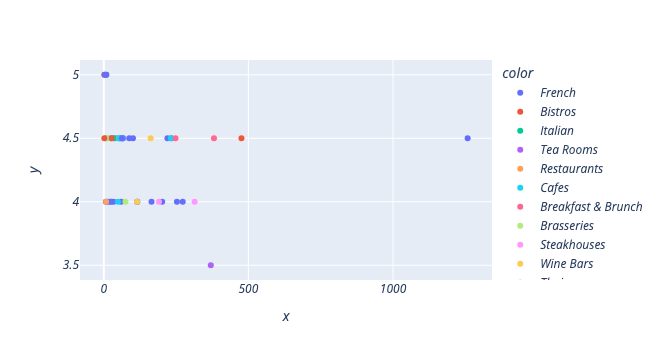

In [803]:
fig = px.scatter(x=business_df['review_count'],y=business_df['rating'], color=business_df['category'])
fig.show()

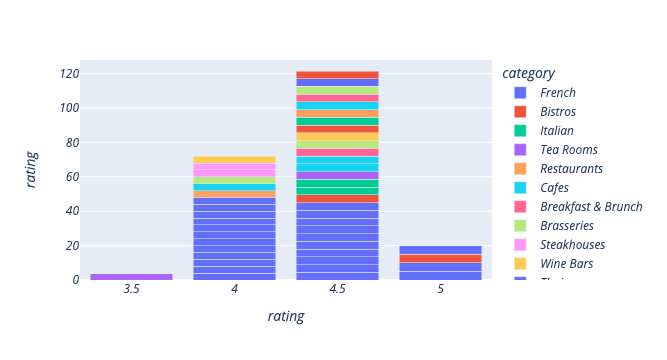

In [815]:
# df = business_df
fig = px.bar(df, x = df['rating'], y=df['rating'],color=df['category'], barmode = 'stack')
fig.show()

In [816]:
import plotly.graph_objects as px



In [837]:
cb_df.head()

,lat,long,empty_slots,free_bikes
0,48.865983,2.275725,29,4
1,48.853756,2.339096,3,50
2,48.867872,2.364898,28,9
3,48.856452,2.334852,16,3
4,48.879296,2.337360,15,4


In [840]:
business_df.head()

,name,rating,review_count,category,city,lat,long
0,Le Comptoir de la Gastronomie,4.5,1258,French,Paris,48.864516,2.345402
1,Bistro des Augustins,4.5,476,Bistros,Paris,48.854754,2.342119
2,Café Blanc,4.5,57,French,Paris,48.862736,2.339585
3,La Régalade,4.5,101,French,Paris,48.861644,2.342016
4,Loup,4.0,60,French,Paris,48.863959,2.342631


In [842]:
fs_df.head()

,fsq_id,name,category,lat,long
0,5b394cae92e7a9002c724cf9,La Maison d'Isabelle,Bakery,48.849807,2.348409
1,59468bd1898bdc07ffc0d6ac,Breizh Café,Dining and Drinking,48.849807,2.348409
2,4df27ab522718759f81c4fc7,Aux Prés,Bistro,48.849807,2.348409
3,4d974096a2c654814aa6d353,Mmmozza,Gourmet Store,48.849807,2.348409
4,5474e08e498e26dc5e12ebb5,Les Amis des Messina,Italian Restaurant,48.849807,2.348409


# SQLite

In [835]:
# Connected to DB

import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("restaurants.sqlite")

Connection to SQLite DB successful


In [836]:
# define execute function
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [839]:
create_bikes_table = """
CREATE TABLE IF NOT EXISTS bike_stations (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  lat FLOAT,
  long FLOAT,
  empty_slots INTEGER,
  free_bikes INTEGER
);
"""

execute_query(connection, create_bikes_table)

Query executed successfully


In [845]:
table_name = 'bike_stations'

conn = sqlite3.connect('restaurants.sqlite')
cb_df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()



In [841]:
create_yelp_table = """
CREATE TABLE IF NOT EXISTS yelp (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name VARCHAR,
  rating FLOAT,
  review_count INTEGER,
  category VARCHAR,
  city VARCHAR,
  lat FLOAT,
  long FLOAT
);
"""

execute_query(connection, create_yelp_table)

Query executed successfully


In [848]:
table_name = 'yelp'

conn = sqlite3.connect('restaurants.sqlite')
business_df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

In [843]:
create_foursquare_table = """
CREATE TABLE IF NOT EXISTS foursquare (
  fsq_id VARCHAR PRIMARY KEY,
  name VARCHAR,
  category VARCHAR,
  lat FLOAT,
  long FLOAT
);
"""

execute_query(connection, create_foursquare_table)

Query executed successfully


In [849]:
table_name = 'foursquare'

conn = sqlite3.connect('restaurants.sqlite')
fs_df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()